C:\Users\esthe\AppData\Local\Temp\ipykernel_2916\1322309668.py:47: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


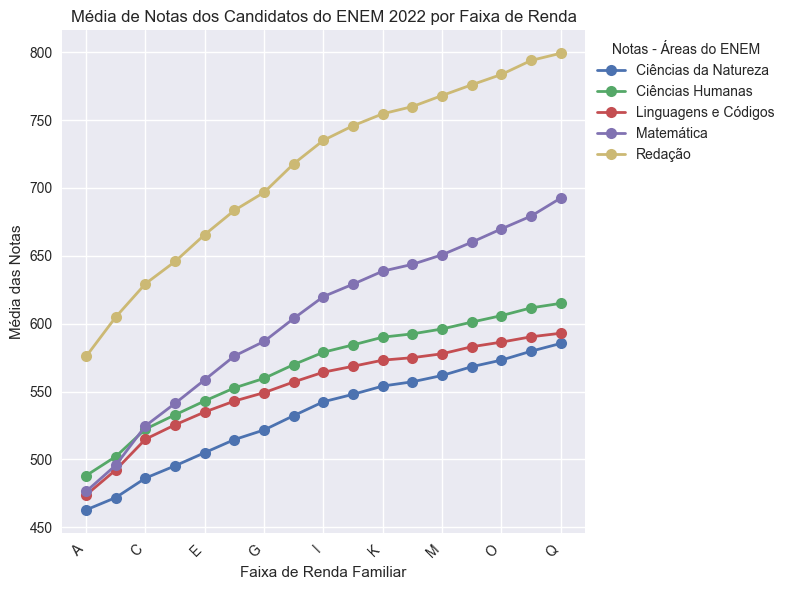

In [15]:
# Parte 1 + 2a
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('Dados\MICRODADOS_ENEM_2022.csv', sep= ';', encoding= 'ISO-8859-1')
filtro_treineiro = df['IN_TREINEIRO'] == 0
filtro_presenca_CN = df['TP_PRESENCA_CN'] == 1
filtro_presenca_CH = df['TP_PRESENCA_CH'] == 1
filtro_presenca_LC = df['TP_PRESENCA_LC'] == 1
filtro_presenca_MT = df['TP_PRESENCA_MT'] == 1
filtro_redacao= df['TP_STATUS_REDACAO'] == 1


filtros_agrupados = filtro_treineiro & filtro_presenca_CN & filtro_presenca_CH & filtro_presenca_LC & filtro_presenca_MT & filtro_redacao
df_filtrado = df[filtros_agrupados]


# agrupa por tipo (nesse caso pela renda) e faz a média das notas de cada competência, ai o gráfico fica renda por média de nota em cada competência
media_notas_por_renda = df_filtrado.groupby('Q006')[['NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT', 'NU_NOTA_REDACAO']].mean()


# # Mapeia os códigos das faixas de renda para os rótulos personalizados
# faixas_de_renda = {
#     'A': 'Nenhuma renda',
#     'B': 'Até R$ 1.212,00',
#     'C': 'De R$ 1.212,01 até R$ 1.818,00.',
#     'D': 'De R$ 1.818,01 até R$ 2.424,00.',
#     'E': 'De R$ 2.424,01 até R$ 3.030,00.',
#     'F': 'De R$ 3.030,01 até R$ 3.636,00.',
#     'G': 'De R$ 3.636,01 até R$ 4.848,00.',
#     'H': 'De R$ 4.848,01 até R$ 6.060,00.',
#     'I': 'De R$ 6.060,01 até R$ 7.272,00.',
#     'J': 'De R$ 7.272,01 até R$ 8.484,00.',
#     'K': 'De R$ 8.484,01 até R$ 9.696,00.',
#     'L': 'De R$ 9.696,01 até R$ 10.908,00.',
#     'M': 'De R$ 10.908,01 até R$ 12.120,00.',
#     'N': 'De R$ 12.120,01 até R$ 14.544,00.',
#     'O': 'De R$ 14.544,01 até R$ 18.180,00.',
#     'P': 'De R$ 18.180,01 até R$ 24.240,00.',
#     'Q': 'Mais de R$ 24.240,00.'
    
# }

# # Renomeia os índices do DataFrame com os rótulos personalizados
# media_notas_por_renda.rename(index=faixas_de_renda, inplace=True)

plt.style.use('seaborn')
plt.figure(figsize=(8,6))

# Cria o gráfico de linhas
media_notas_por_renda.plot(kind='line', marker='o', markersize=8, linewidth=2, ax=plt.gca())

# Configurações adicionais
plt.xlabel('Faixa de Renda Familiar')
plt.ylabel('Média das Notas')
plt.title('Média de Notas dos Candidatos do ENEM 2022 por Faixa de Renda')
# Legenda personalizada
legend_labels = ['Ciências da Natureza', 'Ciências Humanas', 'Linguagens e Códigos', 'Matemática', 'Redação']
plt.legend(legend_labels, title='Notas - Áreas do ENEM', bbox_to_anchor=(1, 1))
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Exibe o gráfico
plt.show()



C:\Users\esthe\AppData\Local\Temp\ipykernel_2916\2907589593.py:7: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


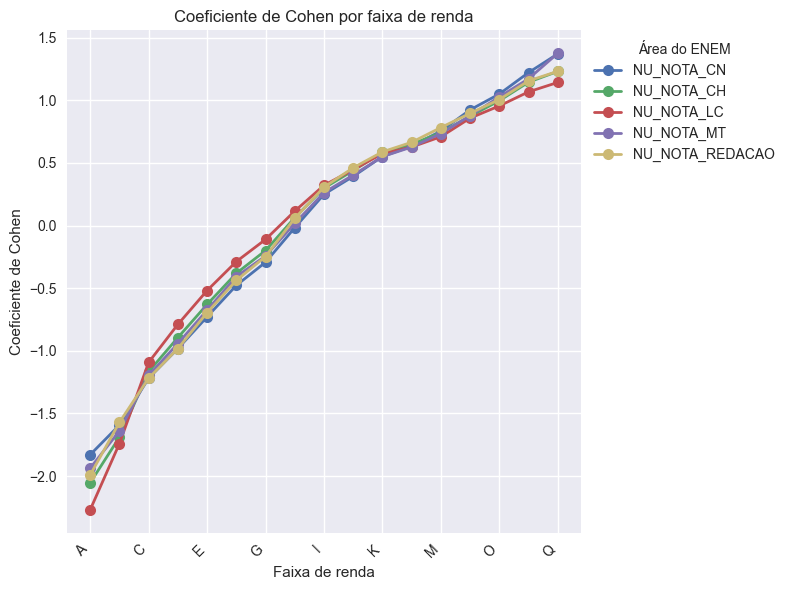

In [18]:
# Parte 2b
media_disciplina = media_notas_por_renda
media_das_medias = media_disciplina.mean()
desvio_padrao = media_disciplina.std()
d_cohen = (media_disciplina - media_das_medias) / desvio_padrao

plt.style.use('seaborn')
plt.figure(figsize=(8,6))
d_cohen.plot(kind='line', marker='o', markersize=8, linewidth=2, ax=plt.gca())

plt.xlabel('Faixa de renda')
plt.ylabel('Coeficiente de Cohen')
plt.title('Coeficiente de Cohen por faixa de renda')
plt.legend(title='Área do ENEM', bbox_to_anchor=(1, 1))
plt.xticks(rotation=45, ha='right')
plt.tight_layout() 
plt.show()